**DEBUG CODE**


In [122]:
from importlib import reload

In [146]:
#this also takes care of all the imports
import analysis_helper
import analysis_graphs
from analysis_helper import *
from analysis_graphs import *
reload(analysis_helper)
reload(analysis_graphs)

10 worlds loaded


<module 'analysis_graphs' from '/Users/felixbinder/Cloud/Grad School/Fan Lab/Block Construction/projection_block_construction/projection_agent/analysis_graphs.py'>

**DEBUG CODE END**

# Block construction agents

This is the main analysis file for the [block construction task](https://github.com/cogtoolslab/block_construction). 

The data should be loaded in by a dataframe produced by experiment_runner.py

In [124]:
#this also takes care of all the imports
from analysis_helper import *
from analysis_graphs import *

Let's load the results of the experiment

In [125]:
df_paths = ['../beam_search.pkl']

In [126]:
#load all experiments as one dataframe
df = pd.concat([pd.read_pickle(l) for l in df_paths])

In [127]:
display(df)

,agent,world,outcome,run
0,type: Beam_Search_Agent beam_width: 1 heuristi...,"int_struct_14|Type: Blockworld dimension: (8, 8)",Fail,b...
1,type: Beam_Search_Agent beam_width: 1 heuristi...,"int_struct_11|Type: Blockworld dimension: (8, 8)",Fail,b...
2,type: Beam_Search_Agent beam_width: 1 heuristi...,"int_struct_3|Type: Blockworld dimension: (8, 8)",Fail,b...
3,type: Beam_Search_Agent beam_width: 1 heuristi...,"int_struct_13|Type: Blockworld dimension: (8, 8)",Fail,b...
4,type: Beam_Search_Agent beam_width: 1 heuristi...,"int_struct_12|Type: Blockworld dimension: (8, 8)",Fail,b...
...,...,...,...,...
7995,type: Beam_Search_Agent beam_width: 256 heuris...,"int_struct_1|Type: Blockworld dimension: (8, 8)",Fail,b...
7996,type: Beam_Search_Agent beam_width: 256 heuris...,"int_struct_15|Type: Blockworld dimension: (8, 8)",Win,b...
7997,type: Beam_Search_Agent beam_width: 256 heuris...,"int_struct_5|Type: Blockworld dimension: (8, 8)",Fail,b...
7998,type: Beam_Search_Agent beam_width: 256 heuris...,"stonehenge_6_4|Type: Blockworld dimension: (6, 4)",Win,b...


We'll have data for the following agents and on the following silhouettes:

In [128]:
smart_short_agent_names(df['agent'].unique())

['Beam_Search_Agent beam_width: 1',
 'Beam_Search_Agent beam_width: 2',
 'Beam_Search_Agent beam_width: 3',
 'Beam_Search_Agent beam_width: 8',
 'Beam_Search_Agent beam_width: 16',
 'Beam_Search_Agent beam_width: 32',
 'Beam_Search_Agent beam_width: 64',
 'Beam_Search_Agent beam_width: 256']

In [129]:
[short_world_name(w) for w in df['world'].unique()]

['int_struct_14',
 'int_struct_11',
 'int_struct_3',
 'int_struct_13',
 'int_struct_12',
 'int_struct_1',
 'int_struct_15',
 'int_struct_5',
 'stonehenge_6_4',
 'stonehenge_3_3']

In [130]:
#TODO plot nice view of worlds used

If we only want to look at results for a particular silhouette or agent, the following syntax can be used:

In [131]:
#df = df[df['world'].str.contains('int_struct_15')]

## Overview over agents
All agents use pure F1 score to judge the value of intermediate states.

| Agent |  | Parameter |
|:--|:--|:--|
| Random (special case of BFS) | Randomly chooses a legal action. | *None* |
| Breadth first search | Agent performs breadth first search on the tree of all possible actions and chooses the sequence of actions that has the highest average reward over the next *planning depth* steps | Horizon: how many steps in advance is the tree of possible actions searched? |
| MCTS | Implements Monte Carlo Tree Search | Horizon: the number of rollouts per run |
| Naive Q learning | Implements naive Q learning with an epsilon-greedy exploration policy | Maximum number of episodes: how many episodes per run |
| A* search | Implements A* search algorithm. Runs until winning state is found or an upper limit of steps is reached. | *None* |
| Beam search | Implements beam search: searches tree of possible action, but only keeps the best *beam size* actions at each iteration | Beam size: the number of states kept under consideration at every step |

### Glossary

**Run**: training (if applicable) and running one agent on one particular silhouette.

**Silhouette**: the particular outline (and set of baseblocks) that the agent has to reconstruct.

**State**: state of the blockworld environment consisting of the blocks that have already been placed in it.

## Success

### Rate of perfect reconstruction per agent

How often does an agent succeed in getting a perfect reconstruction?

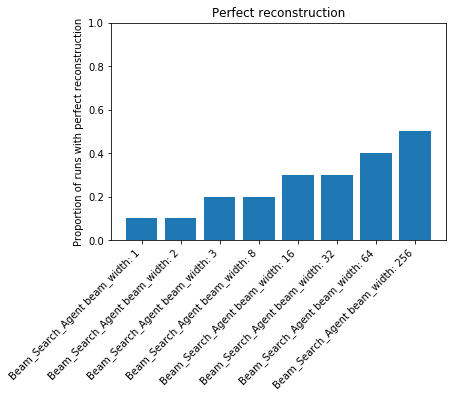

In [132]:
mean_win_per_agent(df)

### F1 score
What [F1 score](https://en.wikipedia.org/wiki/F1_score) does the agent achieve? Since F1 score decreases if an agent keeps building after being unable to perfectly recreate the structure, we look at the peak of F1 score for every run. 

So here is the average peak F1 score per agent conditioned on outcome of the run.

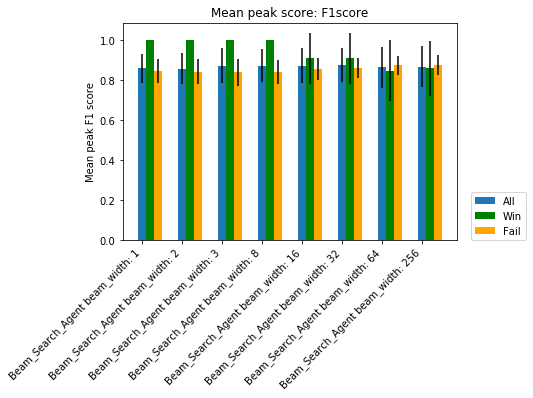

In [133]:
mean_peak_score_per_agent(df)

## Failure kinds
In run where the agent fails to achieve perfect reconstruction, what is the reason for the failure?

**Full** indicates that no further block can be placed.
**Unstable** indicates the structure has collapsed.
**Did not finish** means that the agent hasn't finished building either because it terminated or it reached the limit on number of steps (40).

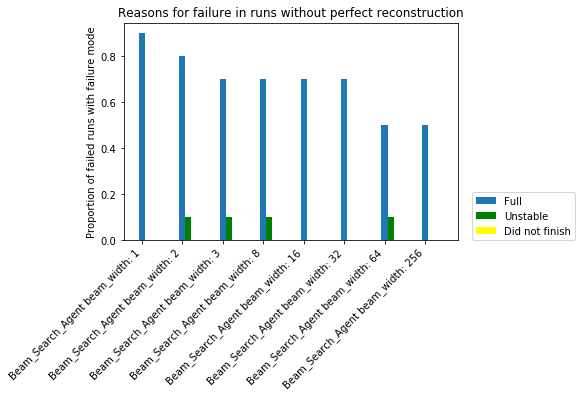

In [134]:
mean_failure_reason_per_agent(df)

## Greediness
Do agents prefer a greedy policy (using large blocks to cover much area) or a conservative policy of using smaller blocks and more steps?

### Number of steps taken
On average, how many steps does an agent take before the end of the run? 

Looking at the average number of steps for runs with perfect reconstruction ("win") tells us whether an agent builds with larger or smaller blocks. 

Looking at the average number of steps for runs with failed reconstructions ("fail") tells whether the failures occur early or late in the process. Since many failures are due to the agent simply filling everything with blocks this number is likely high and not very informative.

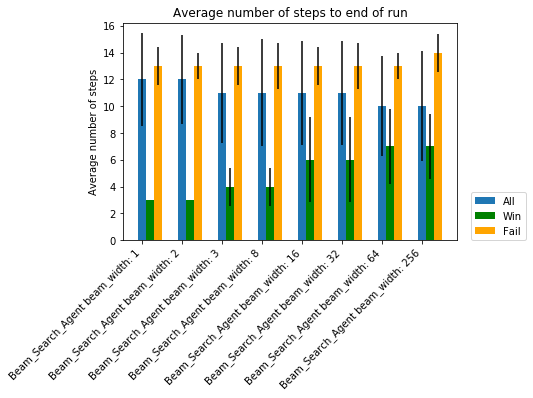

In [135]:
avg_steps_to_end_per_agent(df)

### Average F1 score during run
On average, what is the average F1 score taken over every action up to the peak of F1 score for a particular run? For runs conditioned on perfect reconstructions, what is the growth rate of F1?

The higher this number is, the more F1 score is gained early on in the run (ie. a logaritmic looking curve of F1 score). 
Note that the bars conditioned on winning runs all have a peak F1 score of 1 and are thus directly comparable.

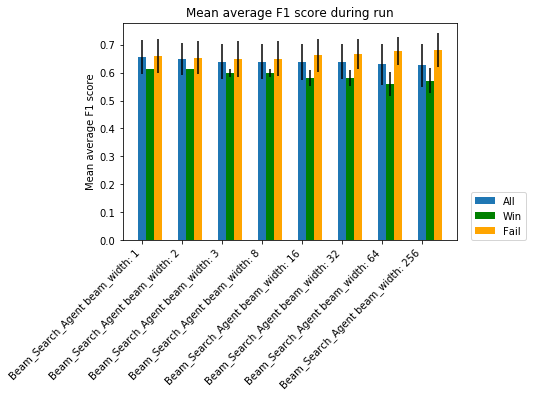

In [136]:
mean_avg_area_under_curve_to_peakF1_per_agent(df)

### Average F1 score over time
What is the average F1 score over time? 

Decreasing line indicates the behavior of the agent to keep choosing the least-worst action if a perfect reconstruction is no longer possible.

For runs that terminate early, the last F1 score is kept as to not show outliers in the later part of the graph. Thus, a perfect reconstruction at step 8 is counted as a score of 1 for the last 12 steps. 

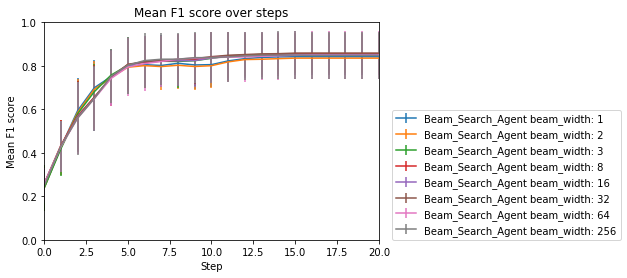

In [137]:
graph_mean_F1_over_time_per_agent(df)

### Average block size over time
What is the average size of the block placed at a certain step?

Note that only runs that aren't finished at a given step are included in the calculation of the mean/std, so later steps might be less informative.

/Users/felixbinder/Cloud/Grad School/Fan Lab/Block Construction/projection_block_construction/projection_agent/analysis_graphs.py:220: RuntimeWarning: Mean of empty slice
/Users/felixbinder/anaconda3/envs/projection_blocks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


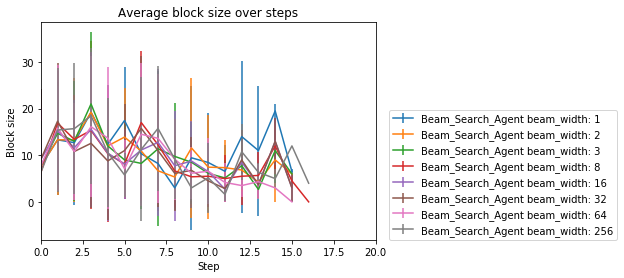

In [138]:
graph_avg_blocksize_over_time_per_agent(df)

## Consistency
How consistent are different runs of the same agent on the same silhouette?

## Locality bias
Does the agent prefer to place a block on top of or next to the last placed block?

The score is calculated by looking at what percentage of blocks placed during a run touch (either top/bottom or sides, not corners) the block placed immediately before. 
A score of 1 indicates that all blocks were placed on the last one, a score of 0 indicates that the agent switched to a different location to build at every opportunity.

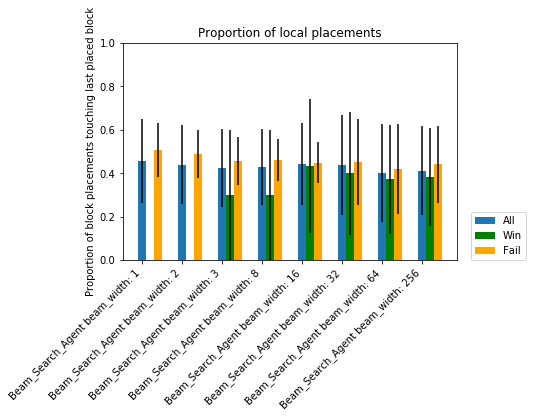

In [147]:
mean_touching_last_block_per_agent(df)